In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

All right, now the question how we can make use of these variables? This is the point where Principal Component Analysis (PCA) comes into the stage. Utilizing PCA, you will be able to obtain components by which you can represent a significant portion of the variance of the original data (`bid_ask`).

In [2]:
#Let's import the spread measure that you generated before.
spread_meas = pd.read_csv('spread_meas.csv')

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

As you have 5 variables (bid-ask spreads), the number of components will be 5 at first in running PCA. Then, you check the variance explained. In theory, there are different methods used to define the optimal number of components. Of them, cutting-off the analysis when you reached a point at which principal components can account for 80\% of the variance of original data makes sense for practical purpose.

So, depending on the number of components used to account for 80\% of the variance, it becomes the optimal number of components.

In [4]:
scaler = StandardScaler()
spread_meas_scaled = scaler.fit_transform(np.abs(spread_meas))
pca = PCA(n_components=5)
prin_comp = pca.fit_transform(spread_meas_scaled)

It turns out first two components are able to explain the 80\% of the variance and 2 components is the optimum number for us.

In [5]:
var_expl = np.round(pca.explained_variance_ratio_, decimals=4)
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_,
                             decimals=4))
print('Individually Explained Variances are:\n{}'.format(var_expl)) 
print('=='*30)
print('Cumulative Explained Variances are: {}'.format(cum_var))  

Individually Explained Variances are:
[0.6245 0.241  0.1001 0.03   0.0043]
Cumulative Explained Variances are: [0.6245 0.8655 0.9656 0.9956 0.9999]


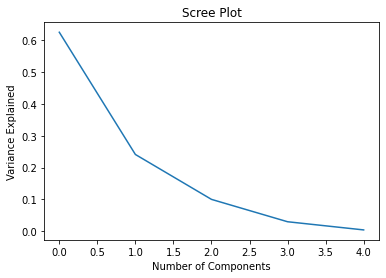

In [6]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

So, let's re-run the PCA with 2 components as we found the optimal number of components.

In [7]:
pca = PCA(n_components=2)
pca.fit(np.abs(spread_meas_scaled))
prin_comp = pca.transform(np.abs(spread_meas_scaled))
prin_comp = pd.DataFrame(np.abs(prin_comp), columns = ['Component 1',
                                                       'Component 2'])
print(pca.explained_variance_ratio_ * 100)  

[59.05686666 17.4739071 ]


In [9]:
prin_comp = prin_comp.to_csv('prin_comp.csv')

This is the crucial part. Because, you need to define a way in which you can use the principal components in the analysis. One of the ways is to calculate mean value of these two principal components. But before doing this, you need to rescale the principal components as you standardized the data before running PCA.

Recall the standardization formula, which is:

\begin{equation}
z = \frac{x - \mu}{\sigma}
\end{equation}

Thus, if you leave x alone, the formula you need to apply for rescaling emerges:

\begin{equation}
x = z *\sigma + \mu 
\end{equation}

In [8]:
prin_comp1_rescaled = prin_comp.iloc[:,0] * prin_comp.iloc[:,0].std()\
                      + prin_comp.iloc[:, 0].mean()
prin_comp2_rescaled = prin_comp.iloc[:,1] * prin_comp.iloc[:,1].std()\
                      + prin_comp.iloc[:, 1].mean()
prin_comp_rescaled = pd.concat([prin_comp1_rescaled, 
                                prin_comp2_rescaled],
                               axis=1)
prin_comp_rescaled.head()

,Component 1,Component 2
0,1.763023,1.318156
1,4.831684,2.000901
2,3.607953,1.615184
3,0.959223,0.650714
4,0.834418,0.787859
